**Importing libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

**Reading Dataset**

In [2]:
path = 'dataset_sdn.csv'
df = pd.read_csv (path)
print(df)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

In [3]:
df.shape

(104345, 23)

In [4]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [5]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [7]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


**Test Pre-processing Dataset (Ignore)**

In [8]:
# to_drop = ['dt']
# df = df.drop(to_drop, axis='columns')
# df = df[df['pktrate'] !=0]

In [9]:
# Getting last two digits from src and dst
# df['src'] = [int(i.split('.')[3]) for i in df['src']]
# df['dst'] = [int(i.split('.')[3]) for i in df['dst']]
# df['switch'] = df['switch'].astype(str) 
# df['src'] = df['src'].astype(str)
# df['dst'] = df['dst'].astype(str)
# df['port_no'] = df['port_no'].astype(str)
# df['Protocol'] = df['Protocol'].astype(str)

In [10]:
# new_df = pd.get_dummies(df,columns = ['switch','src','Protocol','dst','port_no'])
# new_df

In [11]:
# new_df.head()

In [12]:
# checking for null values
# df.isnull().sum()

In [13]:
# new_df.fillna(new_df.mean(), inplace=True)

In [14]:
# new_df

**Preprocessing Data and Cleaning**

At this stage, packet rate, byte per-flow, and packet per flow properties are excluded from the dataset because they contain duplicate values.

In [15]:
df = df.drop(['pktrate', 'byteperflow', 'pktperflow'], axis=1)
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,3,3413,3665,0,0.0,0.0,0


In [16]:
df.shape

(104345, 20)

In [17]:
df['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [18]:
df['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [19]:
df['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

Since src and dst have same starting as 10.0.0.XX so we will keep only last 2 and remove other digits for better understanding.

In [20]:
# Getting last two digits from src and dst
df['src'] = [int(i.split('.')[3]) for i in df['src']]
df['dst'] = [int(i.split('.')[3]) for i in df['dst']]

In [21]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,1943,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,1943,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,0,UDP,3,3413,3665,0,0.0,0.0,0


In [22]:
df.shape

(104345, 20)

**Applying OneHotEncoding**

Categorical variables such as source, destination IP and protocol can be encoded by using one-hot encoding.

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
print(df['Protocol'].value_counts())

ICMP    41321
UDP     33588
TCP     29436
Name: Protocol, dtype: int64


In [25]:
# Extract categorical variables
cat_vars = ['src', 'dst', 'Protocol']

# Perform one-hot encoding
encoder = OneHotEncoder()
encoded_vars = encoder.fit_transform(df[cat_vars])

# Replace categorical variables with one-hot encoded variables
df.drop(cat_vars, axis=1, inplace=True)
encoded_df = pd.DataFrame(encoded_vars.toarray(), columns=encoder.get_feature_names_out(cat_vars))
df = pd.concat([df, encoded_df], axis=1)

# Print the updated DataFrame
print(df.head())

      dt  switch  pktcount  bytecount  dur   dur_nsec       tot_dur  flows  \
0  11425       1     45304   48294064  100  716000000  1.010000e+11      3   
1  11605       1    126395  134737070  280  734000000  2.810000e+11      2   
2  11425       1     90333   96294978  200  744000000  2.010000e+11      3   
3  11425       1     90333   96294978  200  744000000  2.010000e+11      3   
4  11425       1     90333   96294978  200  744000000  2.010000e+11      3   

   packetins  Pairflow  ...  dst_12  dst_13  dst_14  dst_15  dst_16  dst_17  \
0       1943         0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
1       1943         0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2       1943         0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3       1943         0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4       1943         0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

   dst_18  Protocol_ICMP  Protocol_TCP  Protocol_UDP  
0

In [26]:
df.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'label', 'src_1', 'src_2', 'src_3',
       'src_4', 'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10',
       'src_11', 'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17',
       'src_18', 'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5',
       'dst_6', 'dst_7', 'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12',
       'dst_13', 'dst_14', 'dst_15', 'dst_16', 'dst_17', 'dst_18',
       'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP'],
      dtype='object')

Removing dt (datetime) which is not useful for our model.

In [27]:
df = df.drop(['dt'], axis=1)
df

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,Pairflow,port_no,...,dst_12,dst_13,dst_14,dst_15,dst_16,dst_17,dst_18,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,1,45304,48294064,100,716000000,1.010000e+11,3,1943,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,126395,134737070,280,734000000,2.810000e+11,2,1943,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,90333,96294978,200,744000000,2.010000e+11,3,1943,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,90333,96294978,200,744000000,2.010000e+11,3,1943,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,90333,96294978,200,744000000,2.010000e+11,3,1943,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,3,79,7742,81,842000000,8.184200e+10,5,10,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104341,3,79,7742,81,842000000,8.184200e+10,5,10,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104342,3,31,3038,31,805000000,3.180500e+10,5,10,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104343,3,31,3038,31,805000000,3.180500e+10,5,10,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Preparing Training and Testing Sets**

In [28]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Visualizing for better understanding using coorelations on heatmap.

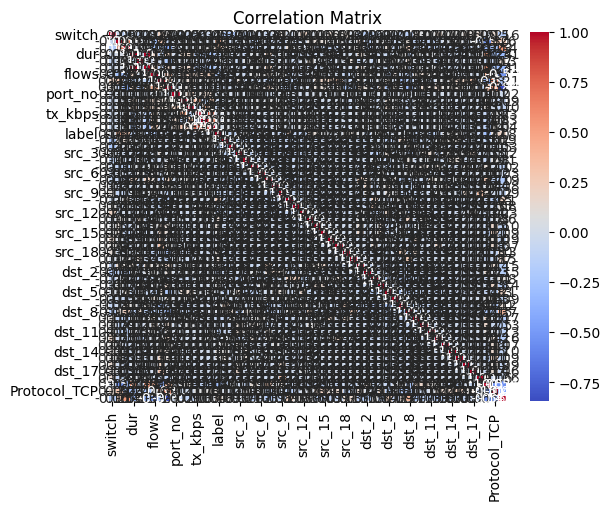

In [29]:
# Remove null values
df.dropna(inplace=True)

# Separate input features and target variable
x = df.drop('label', axis=1)
y = df['label']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Scale the input features
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Performing Normalization on data**

In [30]:
x.columns

Index(['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP'],
      dtype='object')

In [31]:
# Library for normalization of data
from sklearn.preprocessing import MinMaxScaler

In [32]:
# Select columns to normalize
cols_to_norm = ['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

# Print the updated DataFrame
print(df.head())

   switch  pktcount  bytecount       dur  dur_nsec   tot_dur     flows  \
0     0.0  0.174242   0.328245  0.053163  0.716717  0.053723  0.066667   
1     0.0  0.486123   0.915781  0.148857  0.734735  0.149468  0.000000   
2     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   
3     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   
4     0.0  0.347427   0.654498  0.106326  0.744745  0.106915  0.066667   

   packetins  Pairflow  port_no  ...  dst_12  dst_13  dst_14  dst_15  dst_16  \
0   0.076883       0.0     0.50  ...     0.0     0.0     0.0     0.0     0.0   
1   0.076883       0.0     0.75  ...     0.0     0.0     0.0     0.0     0.0   
2   0.076883       0.0     0.00  ...     0.0     0.0     0.0     0.0     0.0   
3   0.076883       0.0     0.25  ...     0.0     0.0     0.0     0.0     0.0   
4   0.076883       0.0     0.50  ...     0.0     0.0     0.0     0.0     0.0   

   dst_17  dst_18  Protocol_ICMP  Protocol_TCP  Protocol_UDP  
0     0.0  

**Model Analysis Function**

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label',
           ylabel='True label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax


In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def show_confusion_matrix(model, data, label, pred_label):
    class_names = ['Normal', 'Attack']
    
    plot_confusion_matrix(label, pred_label, classes=class_names, normalize=True, cmap=plt.cm.Blues)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    print('\n')
    print(classification_report(label, pred_label))
    print(confusion_matrix(label, pred_label))
    print('\n')


**Classification**

We now train our ML models to predict whether the traffic is malicious (labelled as "1") or benign (labelled as "0").
For classification, we have used 7 different types of classifiers, viz. Gaussian Naive Bayes (GNB), Logistic Regression (LR), Support Vector Classifier (SVC), Ensemble Classifier (GBC), Decision Tree (DT), Artificial Neural Network (ANN) , Deep Learning (LSTM)

**Gaussian Naive Bayes(GNB)**

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
gnb = GaussianNB()

gnb.fit(x_train, y_train.values.ravel())
y_test_pred_gnb = gnb.predict(x_test)

In [43]:
print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))

Train score is: 0.6240204162704193
Test score is: 0.6260593220338984


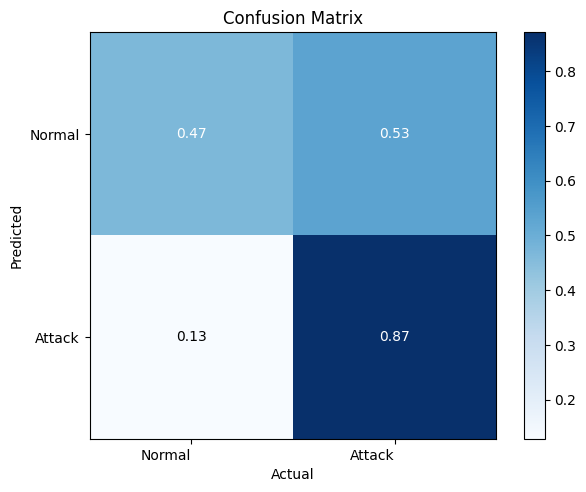



              precision    recall  f1-score   support

           0       0.85      0.47      0.60     12616
           1       0.51      0.87      0.65      8152

    accuracy                           0.63     20768
   macro avg       0.68      0.67      0.62     20768
weighted avg       0.72      0.63      0.62     20768

[[5897 6719]
 [1047 7105]]




In [44]:
show_confusion_matrix(gnb,x_test,y_test,y_test_pred_gnb)

**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)

In [46]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.8041915951415055
Test score is: 0.8022438366718028


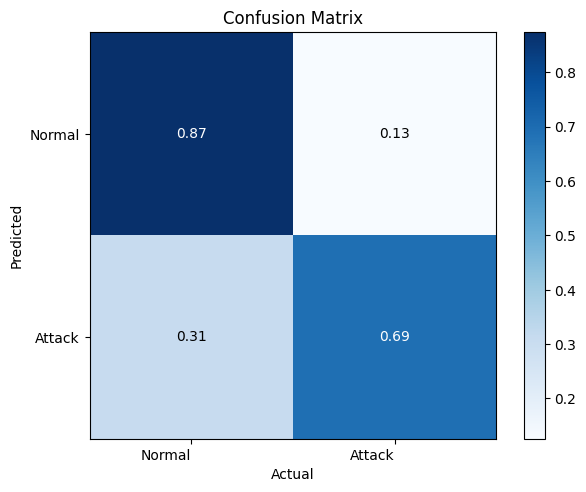



              precision    recall  f1-score   support

           0       0.81      0.87      0.84     12616
           1       0.78      0.69      0.73      8152

    accuracy                           0.80     20768
   macro avg       0.80      0.78      0.79     20768
weighted avg       0.80      0.80      0.80     20768

[[11027  1589]
 [ 2518  5634]]




In [47]:
show_confusion_matrix(lr,x_test,y_test,y_pred_lr)

**Support Vector Classifier (SVC)**

In [48]:
from sklearn.svm import SVC

In [49]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_pred_svc = svc.predict(x_test)

In [50]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [51]:
print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))

Train score is: 0.9635853667344801
Test score is: 0.9602754237288136


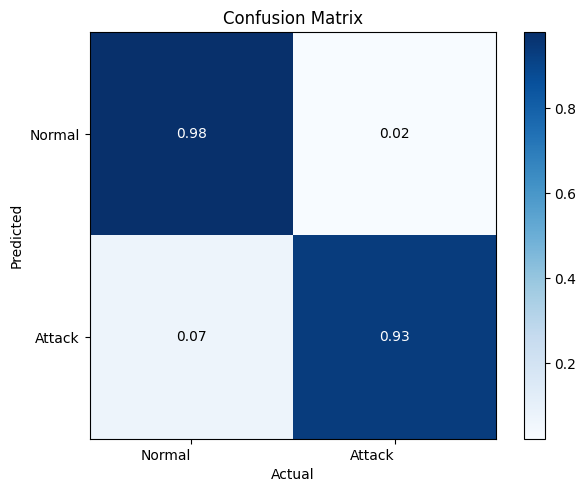



              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12616
           1       0.97      0.93      0.95      8152

    accuracy                           0.96     20768
   macro avg       0.96      0.96      0.96     20768
weighted avg       0.96      0.96      0.96     20768

[[12341   275]
 [  550  7602]]




In [52]:
show_confusion_matrix(svc,x_test,y_test,y_pred_svc)

**Ensemble Classifier (GBC)**

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
  
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [54]:
y_pred_gbc = gbc.predict(x_test)

In [55]:
print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))

Train score is: 0.9684968280145899
Test score is: 0.967883281972265


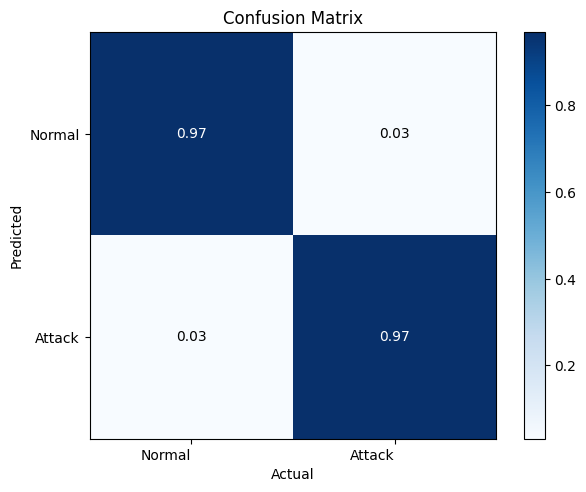



              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12616
           1       0.95      0.97      0.96      8152

    accuracy                           0.97     20768
   macro avg       0.97      0.97      0.97     20768
weighted avg       0.97      0.97      0.97     20768

[[12227   389]
 [  278  7874]]




In [56]:
show_confusion_matrix(gbc,x_test,y_test,y_pred_gbc)

**Decision Tree (DT)**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [36]:
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]


# specify model
model = DecisionTreeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,1.162905,0.022618,0.029163,1.100183e-03,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.995666,0.991573,0.993620,0.002047,1,1.000000,1.000000,1.000000,0.000000
1,0.212418,0.010870,0.026005,1.489925e-02,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.696745,0.691947,0.694346,0.002399,11,0.692163,0.696817,0.694490,0.002327
2,0.359432,0.003744,0.020573,7.561922e-03,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.751204,0.752065,0.751634,0.000430,9,0.752474,0.750843,0.751658,0.000816
3,0.453502,0.003838,0.023085,1.086509e-02,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.791386,0.788227,0.789806,0.001579,7,0.788540,0.791289,0.789915,0.001375
4,0.521898,0.006242,0.028717,2.539635e-03,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.812018,0.815216,0.813617,0.001599,5,0.815553,0.812139,0.813846,0.001707
5,0.601603,0.007810,0.031252,2.264977e-06,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.846711,0.849187,0.847949,0.001238,4,0.849452,0.846928,0.848190,0.001262
6,1.101636,0.023437,0.031258,3.695488e-06,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.994487,0.991959,0.993223,0.001264,2,1.000000,1.000000,1.000000,0.000000
7,0.222870,0.004110,0.021739,6.201267e-03,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.696263,0.691128,0.693696,0.002568,12,0.691369,0.696095,0.693732,0.002363
8,0.359399,0.000001,0.015628,8.344650e-07,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.749759,0.751005,0.750382,0.000623,10,0.750861,0.749783,0.750322,0.000539
9,0.456320,0.003164,0.023441,7.810593e-03,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.785704,0.787095,0.786400,0.000696,8,0.783171,0.790230,0.786700,0.003530


In [37]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9936198908581936 corresponding to hyperparameters {'criterion': 'gini', 'max_depth': None}


In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred_dt = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_dt).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 45
Accuracy: 1.00


In [40]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
x.columns

[[12591    25]
 [   20  8132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12616
           1       1.00      1.00      1.00      8152

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768



Index(['switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
       'tx_kbps', 'rx_kbps', 'tot_kbps', 'src_1', 'src_2', 'src_3', 'src_4',
       'src_5', 'src_6', 'src_7', 'src_8', 'src_9', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_20', 'dst_1', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7',
       'dst_8', 'dst_9', 'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14',
       'dst_15', 'dst_16', 'dst_17', 'dst_18', 'Protocol_ICMP', 'Protocol_TCP',
       'Protocol_UDP'],
      dtype='object')

In [193]:
# from sklearn import tree
# from IPython.display import Image, display
# import matplotlib.pyplot as plt, pydotplus
# from IPython.display import Image, display

# dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
#                                 feature_names=['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
#        'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
#        'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
#        'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
#        'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
#        'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
#        'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
#        'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
#        'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
#        'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
#        'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
#        'port_no_4', 'port_no_5'],  
#                                 class_names=['Malicious','Benign'])
# graph = pydotplus.graph_from_dot_data(dot_data)  
# display(Image(graph.create_png()))

**Artificial Neural Network (ANN)**

In [57]:
from keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [58]:
print(x_train.shape)

(83071, 55)


In [59]:
dense_1 = Dense(25,activation = 'tanh')
dense_2 = Dense(8,activation = 'selu')
dense_3 = Dense(25,activation = 'tanh')

inputs = Input(shape = (55,))
dense_x1 = dense_1(inputs)
dense_x2 = dense_2(dense_x1)
dense_x3 = dense_3(dense_x2)
outputs = Dense(1,activation = 'linear',name = 'reconstruction')(dense_x3)

model_ann = Model(inputs = inputs,outputs = outputs)


filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_ann.compile(optimizer = 'adam',loss = 'mse',metrics = ['accuracy'],)
model_ann.summary()

history = model_ann.fit(x_train,y_train,epochs = 50,batch_size = 400,callbacks = callbacks_list,validation_data=(x_test, y_test),verbose=1) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 55)]              0         
                                                                 
 dense (Dense)               (None, 25)                1400      
                                                                 
 dense_1 (Dense)             (None, 8)                 208       
                                                                 
 dense_2 (Dense)             (None, 25)                225       
                                                                 
 reconstruction (Dense)      (None, 1)                 26        
                                                                 
Total params: 1,859
Trainable params: 1,859
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
201/208 [===========================>..] - ETA: 

Epoch 24/50
194/208 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9798
Epoch 24: val_accuracy improved from 0.97973 to 0.98098, saving model to best_weights.hdf5
208/208 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9799 - val_loss: 0.0212 - val_accuracy: 0.9810
Epoch 25/50
198/208 [===========================>..] - ETA: 0s - loss: 0.0205 - accuracy: 0.9810
Epoch 25: val_accuracy did not improve from 0.98098
208/208 [==============================] - 1s 6ms/step - loss: 0.0205 - accuracy: 0.9812 - val_loss: 0.0210 - val_accuracy: 0.9798
Epoch 26/50
204/208 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9814
Epoch 26: val_accuracy improved from 0.98098 to 0.98127, saving model to best_weights.hdf5
208/208 [==============================] - 1s 6ms/step - loss: 0.0200 - accuracy: 0.9814 - val_loss: 0.0203 - val_accuracy: 0.9813
Epoch 27/50
203/208 [============================>.] - ETA: 0s - loss: 0.0194 - ac

In [60]:
model_ann.evaluate(x_test,y_test)

649/649 [==============================] - 3s 4ms/step - loss: 0.0127 - accuracy: 0.9872


[0.012737459503114223, 0.9872399568557739]

In [61]:
predict = model_ann.predict(x_test)
predict= np.round(predict)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

649/649 [==============================] - 2s 3ms/step
[[12454   162]
 [  103  8049]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12616
           1       0.98      0.99      0.98      8152

    accuracy                           0.99     20768
   macro avg       0.99      0.99      0.99     20768
weighted avg       0.99      0.99      0.99     20768



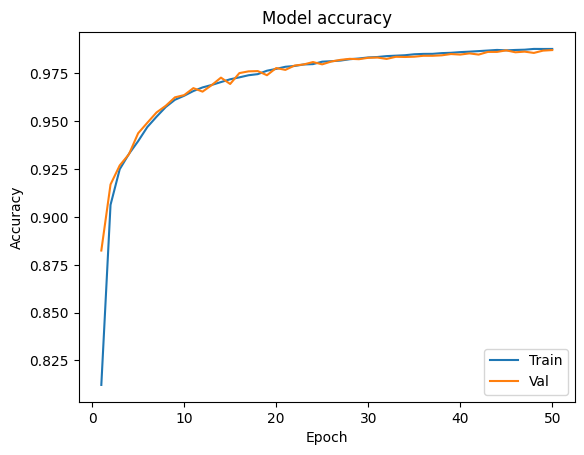

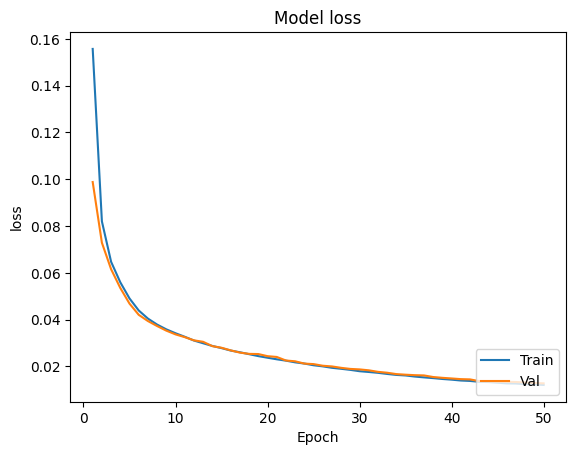

In [62]:
epochs=50
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['accuracy'])
    plt.plot(epochs_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

**Deep Learning - Long short-term memory (LSTM)**

In [63]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dropout, Activation

In [64]:
x_test.shape

(20768, 55)

In [65]:
x_train=x_train.reshape(83071, 55, 1)
x_test=x_test.reshape(20768, 55, 1)

In [66]:
print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(55,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

Build model...


In [67]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [68]:
history=model.fit(x_train, y_train, epochs = 20, batch_size=64,validation_data=(x_test, y_test),verbose=1)

Epoch 1/20
1298/1298 [==============================] - 118s 86ms/step - loss: 0.5353 - acc: 0.7198 - val_loss: 0.4523 - val_acc: 0.7812
Epoch 2/20
1298/1298 [==============================] - 112s 86ms/step - loss: 0.3812 - acc: 0.8197 - val_loss: 0.3182 - val_acc: 0.8515
Epoch 3/20
1298/1298 [==============================] - 113s 87ms/step - loss: 0.2935 - acc: 0.8660 - val_loss: 0.2606 - val_acc: 0.8855
Epoch 4/20
1298/1298 [==============================] - 111s 86ms/step - loss: 0.2399 - acc: 0.8936 - val_loss: 0.2072 - val_acc: 0.9061
Epoch 5/20
1298/1298 [==============================] - 111s 85ms/step - loss: 0.1953 - acc: 0.9152 - val_loss: 0.1649 - val_acc: 0.9271
Epoch 6/20
1298/1298 [==============================] - 111s 86ms/step - loss: 0.1668 - acc: 0.9286 - val_loss: 0.1289 - val_acc: 0.9459
Epoch 7/20
1298/1298 [==============================] - 111s 86ms/step - loss: 0.1481 - acc: 0.9386 - val_loss: 0.1251 - val_acc: 0.9493
Epoch 8/20
1298/1298 [===================

In [69]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

649/649 [==============================] - 17s 26ms/step - loss: 0.0702 - acc: 0.9710
Accuracy: 97.10%


In [70]:
y_pred = model.predict(x_test)
predict= np.round(y_pred)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

649/649 [==============================] - 15s 22ms/step


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     12616
           1       0.97      0.96      0.96      8152

    accuracy                           0.97     20768
   macro avg       0.97      0.97      0.97     20768
weighted avg       0.97      0.97      0.97     20768



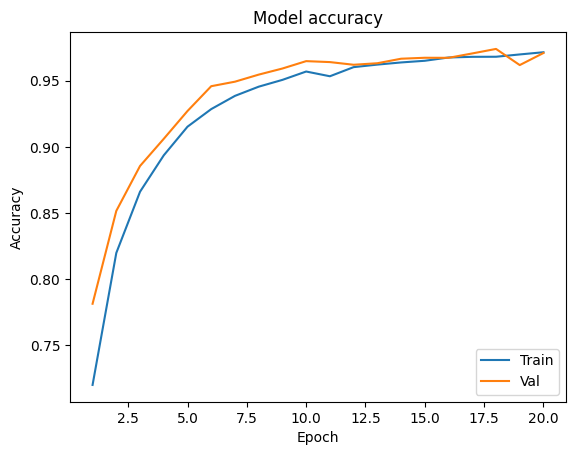

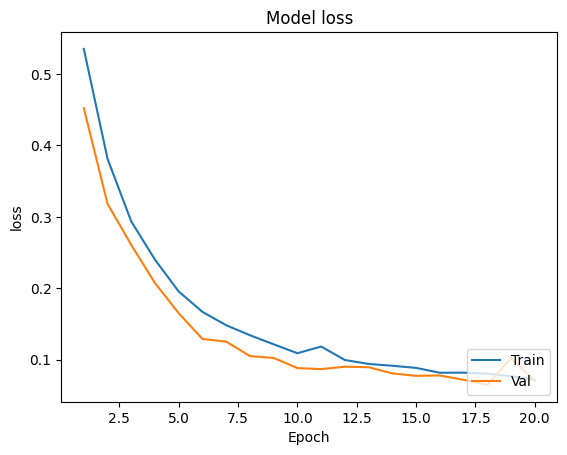

In [71]:
epochs=20
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

### Analysis

In [72]:
from sklearn.metrics import roc_curve, auc

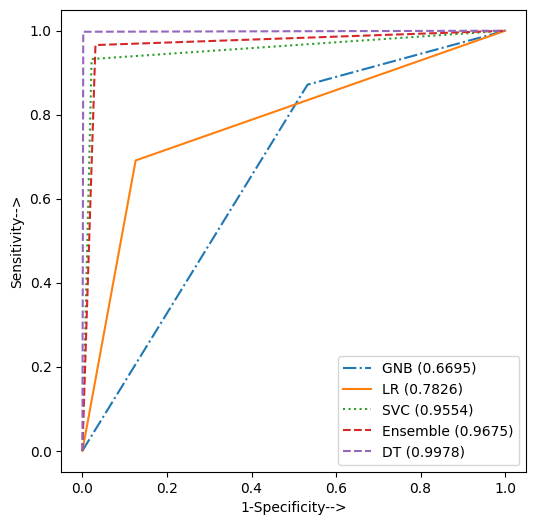

In [73]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_lr)
g_fpr, g_tpr, threshold2 = roc_curve(y_test, y_test_pred_gnb)
e_fpr, e_tpr, threshold3 = roc_curve(y_test, y_pred_gbc)
s_fpr, s_tpr, threshold4 = roc_curve(y_test, y_pred_svc)
d_fpr, d_tpr, threshold4 = roc_curve(y_test, y_pred_dt)


auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_e = auc(e_fpr, e_tpr)
auc_d = auc(d_fpr, d_tpr)


plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='GNB (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(e_fpr, e_tpr, linestyle='--', label='Ensemble (%.4f)' %auc_e)
plt.plot(d_fpr, d_tpr, linestyle='--', label='DT (%.4f)' %auc_d)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()